Data Wrangling II 
Create an “Academic performance” dataset of students and perform the following operations using 
Python. 
 
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or 
inconsistencies, use any of the suitable techniques to deal with them.   
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable 
techniques to deal with them.  
3. Apply data transformations on at least one of the variables. The purpose of this 
transformation should be one of the following reasons: to change the scale for better 
understanding of the variable, to convert a non-linear relation into a linear one, or to 
decrease the skewness and convert the distribution into a normal distribution.  
 
Reason and document your approach properly. 

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
#Create dataset for student performance
# Create a dictionary with the data
data = {
    'name': pd.Series(['Alice', 'Bob', 'Charlie', 'David', 'Emma', 'Frank', 'Grace', 'Henry', 'Ivy', 'Jack',
                       'Katie', 'Liam', 'Mia', 'Nate', 'Olivia', 'Peter', 'Quinn', 'Rachel', 'Sam', 'Tyler']),
    'division': pd.Series(['A', 'B', 'A', 'C', 'B', 'A', 'B', 'C', 'B', 'A', 'C', 'B', 'A', 'C', 'B', 'A', 'C',
                           'B', 'A', 'C']),
    'marks1': pd.Series([70, 80, 85, 90, 95, 65, 75, 60, 50, 85, np.nan, 55, 80, 70, 75, 40, 90, 80, 85, 65]),
    'marks2': pd.Series([60, 70, 75, 80, 85, 55, 65, 50, 40, 75, 80, 45, 70, 60, np.nan, 30, 80, 70, 75, 55]),
    'marks3': pd.Series([5, 60, 65, 70, 75, 45, 55, 40, 30, 65, 70, 35, 60, 50, 55, 20, 70, 60, np.nan, 45])
}

# Create the dataframe
df = pd.DataFrame(data)

In [3]:
df.sample(7)

,name,division,marks1,marks2,marks3
13,Nate,C,70.0,60.0,50.0
1,Bob,B,80.0,70.0,60.0
12,Mia,A,80.0,70.0,60.0
15,Peter,A,40.0,30.0,20.0
18,Sam,A,85.0,75.0,NaN
7,Henry,C,60.0,50.0,40.0
8,Ivy,B,50.0,40.0,30.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      20 non-null     object 
 1   division  20 non-null     object 
 2   marks1    19 non-null     float64
 3   marks2    19 non-null     float64
 4   marks3    19 non-null     float64
dtypes: float64(3), object(2)
memory usage: 932.0+ bytes


In [5]:
df.isna().sum()

name        0
division    0
marks1      1
marks2      1
marks3      1
dtype: int64

In [6]:
# Fill NaN values in marks1 with the mean of marks2 and marks3 for that row
df['marks1'].fillna(df[['marks2', 'marks3']].mean(axis=1), inplace=True)

# Fill NaN values in marks2 with the mean of marks1 and marks3 for that row
df['marks2'].fillna(df[['marks1', 'marks3']].mean(axis=1), inplace=True)

# Fill NaN values in marks3 with the mean of marks1 and marks2 for that row
df['marks3'].fillna(df[['marks1', 'marks2']].mean(axis=1), inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_25560\4261980456.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['marks1'].fillna(df[['marks2', 'marks3']].mean(axis=1), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_25560\4261980456.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [7]:
df.isna().sum()

name        0
division    0
marks1      0
marks2      0
marks3      0
dtype: int64

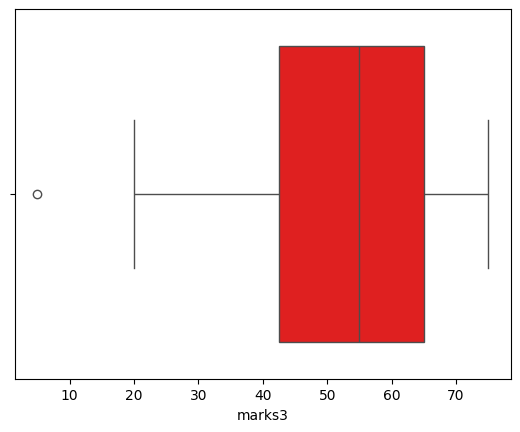

In [8]:
#Outlier present in 'marks3' can be visualized below

sns.boxplot(data= data, x= 'marks3', color= 'red');

In [9]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    IQR = Q3 - Q1
    # print(Q1,Q3,IQR)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

In [10]:
outliers = detect_outliers_iqr(data['marks3'])
outliers

0    5.0
dtype: float64

In [11]:
data_wo_outliers = df[~df['marks3'].isin(outliers)]
data_wo_outliers

,name,division,marks1,marks2,marks3
1,Bob,B,80.0,70.0,60.0
2,Charlie,A,85.0,75.0,65.0
3,David,C,90.0,80.0,70.0
4,Emma,B,95.0,85.0,75.0
5,Frank,A,65.0,55.0,45.0
6,Grace,B,75.0,65.0,55.0
7,Henry,C,60.0,50.0,40.0
8,Ivy,B,50.0,40.0,30.0
9,Jack,A,85.0,75.0,65.0
10,Katie,C,75.0,80.0,70.0


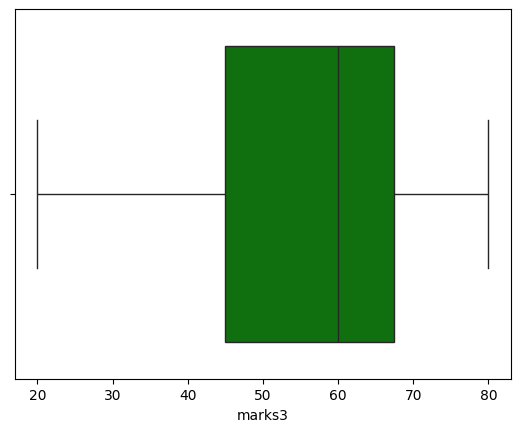

In [12]:
# The outlier has been removed and this can be visualized by the plot below
sns.boxplot(data= data_wo_outliers, x= 'marks3', color= 'green');

In [13]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
df[['marks1', 'marks2', 'marks3']] = scaler.fit_transform(df[['marks1', 'marks2', 'marks3']])

In [15]:
df

,name,division,marks1,marks2,marks3
0,Alice,A,-0.250480,-0.294552,-2.539005
1,Bob,B,0.465177,0.398511,0.385503
2,Charlie,A,0.823005,0.745043,0.651368
3,David,C,1.180833,1.091574,0.917232
4,Emma,B,1.538661,1.438106,1.183096
5,Frank,A,-0.608308,-0.641083,-0.412090
6,Grace,B,0.107348,0.051980,0.119639
7,Henry,C,-0.966136,-0.987615,-0.677954
8,Ivy,B,-1.681792,-1.680678,-1.209683
9,Jack,A,0.823005,0.745043,0.651368


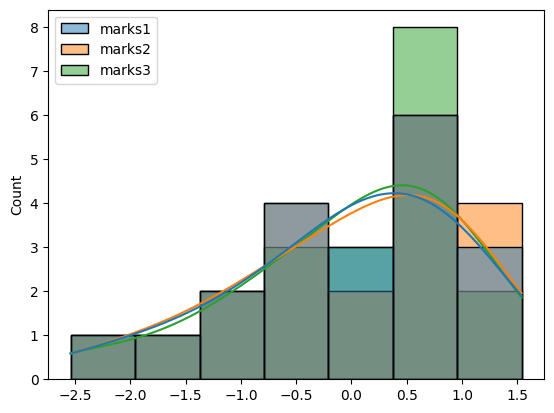

In [14]:
sns.histplot(df, kde=True);